<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
test = boston_housing.load_data()

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [0]:
# Preprocess y
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
# Normalize the data
# scaler = StandardScaler()
scaler = MinMaxScaler()

In [0]:
# Fit transform train, transform test
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

# scaler = StandardScaler()
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [70]:
# Instantiate model, use model.add() to add layers
model = Sequential(name='Boston')
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', 'mae'])
model.summary()

Model: "Boston"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=400, validation_split=.10, verbose=0)

In [17]:
type(history)

tensorflow.python.keras.callbacks.History

In [0]:
dir(history)

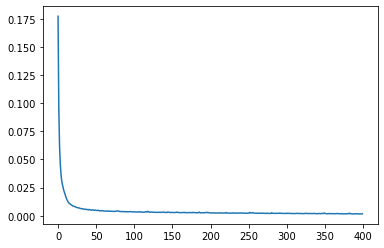

In [72]:
plt.plot(history.epoch, history.history['loss']);

In [73]:
# NN did a little better
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred)

0.00848599228149296

In [74]:
# Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.011454616916752059

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
x_train

In [0]:
pd.Series(y_train).value_counts()

In [0]:
from keras.utils import to_categorical
#convert y to categorical:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [81]:
x_train.shape

(60000, 28, 28)

In [0]:

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [103]:
model = Sequential(name='Fashion')
model.add(Dense(20, input_dim=784, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "Fashion"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_25 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_26 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________


In [105]:
history = model.fit(x_train, y_train, epochs=100, validation_split=.10, verbose=1,
                    batch_size=6000)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 0s 9us/sample - loss: 0.7618 - acc: 0.7631 - val_loss: 0.7070 - val_acc: 0.7815
Epoch 2/100
54000/54000 [==============================] - 0s 8us/sample - loss: 0.6815 - acc: 0.7835 - val_loss: 0.6412 - val_acc: 0.7997
Epoch 3/100
54000/54000 [==============================] - 0s 8us/sample - loss: 0.6253 - acc: 0.7994 - val_loss: 0.5989 - val_acc: 0.8050
Epoch 4/100
54000/54000 [==============================] - 0s 8us/sample - loss: 0.5863 - acc: 0.8099 - val_loss: 0.5685 - val_acc: 0.8120
Epoch 5/100
54000/54000 [==============================] - 0s 8us/sample - loss: 0.5563 - acc: 0.8184 - val_loss: 0.5454 - val_acc: 0.8187
Epoch 6/100
54000/54000 [==============================] - 0s 8us/sample - loss: 0.5345 - acc: 0.8231 - val_loss: 0.5312 - val_acc: 0.8203
Epoch 7/100
54000/54000 [==============================] - 0s 8us/sample - loss: 0.5177 - acc: 0.8286 - val_loss: 0.5

In [114]:
scores = model.evaluate(x_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3880 - acc: 0.8629
acc: 86.29000186920166


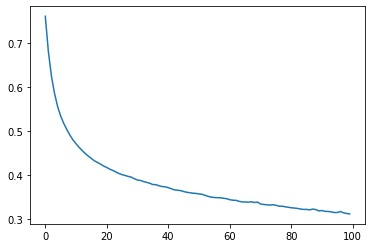

In [106]:
plt.plot(history.epoch, history.history['loss']);

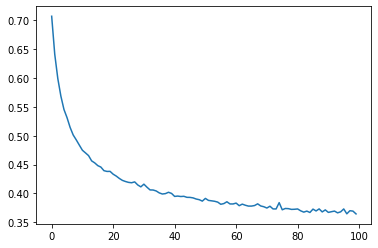

In [112]:
plt.plot(history.epoch, history.history['val_loss']);

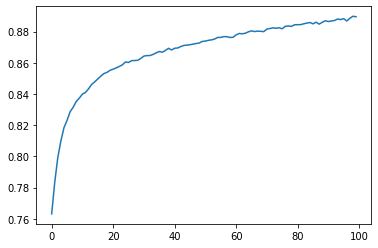

In [108]:
plt.plot(history.epoch, history.history['acc']);

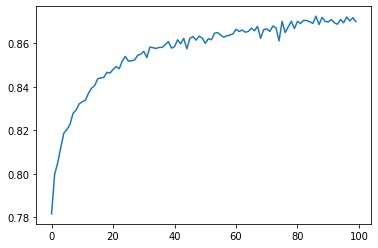

In [111]:
plt.plot(history.epoch, history.history['val_acc']);

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.